# Aluno: Fernando Gomes Papi

In [1]:
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_expected_return(w, r):
    return np.dot(w,r)

def calc_variance(w, covariance_matrix):
    return np.dot(np.dot(w, covariance_matrix), w)

def calc_portfolio_coefficients(sigma_1, sigma_2, correlation):
    a = sigma_1**2 + sigma_2**2 - 2*correlation*sigma_1*sigma_2
    b = -2*(sigma_2**2 - correlation*sigma_1*sigma_2)
    c = sigma_2**2

    return a, b, c

def calc_min_risk_2_assets(sigma_1, sigma_2, correlation):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    min_risk_w = -b/(2*a)

    return min_risk_w

def solve_portfolio(sigma_1, sigma_2, correlation, desired_variance):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    l1 = (-b + np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    l2 = (-b - np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    return l1, l2

def get_risk_return_table(r, weight_list, covariance_matrix):
    risk_return_table = []
    for w in weight_list:
        expected_value = calc_expected_return(w, r)
        portfolio_variance = calc_variance(w, covariance_matrix)
        risk_return_table.append([w[0], expected_value, portfolio_variance])
    
    return risk_return_table

def print_return_table(risk_return_table, headers=['w_1', 'E(P)', 'Var(P)' ], floatfmt=".4"):
    print(tabulate(risk_return_table, headers, tablefmt="outline", floatfmt=floatfmt))

In [3]:
def plot_risk_return(rr_table, annotate=True, risk='σ(P)', risk_free=None):    
    # Extract the data sorted by variance low to high
    
    sorted_rr_table = sorted(rr_table, key=lambda x: x[2])
    asset1_amounts = [row[0] for row in sorted_rr_table]
    expected_values = [row[1] for row in sorted_rr_table]
    risk_values = [row[2]**0.5 for row in sorted_rr_table]
    
    # Create a color gradient based on risk (from blue to red)
    colors = plt.cm.RdYlBu(np.linspace(1, 0, len(risk_values)))
    
    # Create the scatter plot
    fig = plt.figure(figsize=(7, 7))
    fig = plt.scatter(risk_values, expected_values, c=colors, s=60, marker='o', edgecolors='k', zorder=3)
    
    # Add labels and a colorbar
    fig = plt.xlabel(risk)
    fig = plt.ylabel('E(P)')
    fig = plt.title('Risk vs. Expected Return')

    if annotate:
        for i, amount in enumerate(asset1_amounts):
            fig = plt.annotate(f'$w_1$={amount:.2f}', (risk_values[i], expected_values[i]), 
                               textcoords="offset points", 
                               xytext=(0,10), ha='center', 
                               bbox=dict(boxstyle='round, pad=0.2',
                               edgecolor='wheat', facecolor='wheat', alpha=0.25))


    if risk_free:
        fig = plt.plot([0, risk_free['w_t'][0]], [risk_free['r_f'], risk_free['w_t'][1]], c='orangered')
        fig = plt.scatter([0, risk_free['w_t'][0]], [risk_free['r_f'], risk_free['w_t'][1]], c='orangered')
        expected_values += [0, risk_free['r_f'], risk_free['w_t'][1]]

    # Show the plot
    fig = plt.grid(True)
    fig = plt.show()

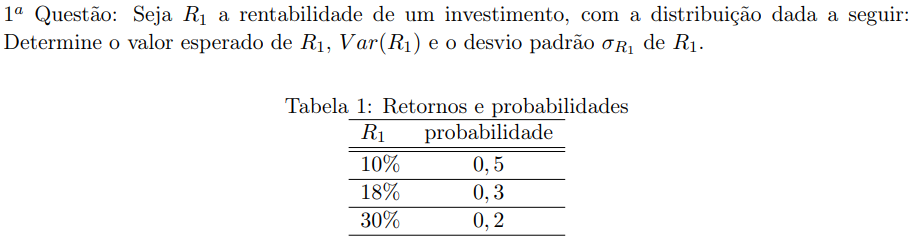

O valor esperado é:
$$E(R_1) = 0.1 * 0.5 + 0.18 * 0.3 + 0.3*0.2 = 0.164$$

A variância é dada por:
$$Var(R_1) = E(R_1^2) - E(R_1)^2 = 0.005824$$

E o devio padrão é:
$$\sigma_{R_1} = \sqrt{Var(R_1)} = 0.076315 $$

In [4]:
r1 = np.array([0.1, 0.18, 0.30])
p1 = np.array([0.5, 0.3, 0.2])

In [5]:
expected_value = np.dot(r1, p1)
variance = np.dot(r1**2, p1) - expected_value**2
std_dev = variance ** 0.5

In [6]:
print(f"Valor Esperado: {expected_value :.4f}")
print(f"Variância: {variance :.6f}")
print(f"Desvio Padrão: {std_dev :.6f}")

Valor Esperado: 0.1640
Variância: 0.005824
Desvio Padrão: 0.076315


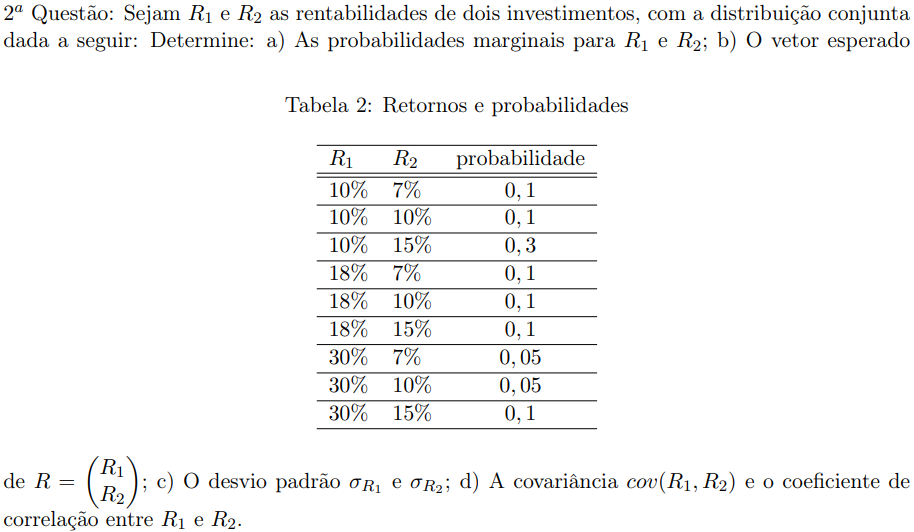

In [7]:
import numpy as np

# Define the first set of returns and probabilities
r1 = np.array([0.1, 0.18, 0.30])
p1 = np.array([0.5, 0.3, 0.2])

# Calculate expected value, variance, and standard deviation for the first set
expected_value_a1 = np.dot(r1, p1)
variance_a1 = np.dot(r1**2, p1) - expected_value_a1**2
std_dev_a1 = variance_a1 ** 0.5

# Define the second set of returns and probabilities
r2 = np.array([0.07, 0.1, 0.15])
p2 = np.array([0.25, 0.25, 0.5])

# Calculate expected value, variance, and standard deviation for the second set
expected_value_a2 = np.dot(r2, p2)
variance_a2 = np.dot(r2**2, p2) - expected_value_a2**2
std_dev_a2 = variance_a2 ** 0.5

# Print statistics for the first and second sets
print(f"Valor esperado R1: {expected_value_a1 :.4f}")
print(f"Variância R1: {variance_a1 :.6f}")
print(f"Desvio Padrão R1: {std_dev_a1 :.6f}")
print('-x-')
print(f"Valor esperado R2: {expected_value_a2 :.4f}")
print(f"Variância R2: {variance_a2 :.6f}")
print(f"Desvio Padrão R2: {std_dev_a2 :.6f}")

# Define conditional probabilities
cond_probabilities = [0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.05, 0.05, 0.1]

# Calculate the covariance between r1 and r2
covariance = np.dot(np.array([r1[0], r1[0], r1[0], r1[1], r1[1], r1[1], r1[2], r1[2], r1[2]]) * np.array([r2[0], r2[1], r2[2], r2[0], r2[1], r2[2], r2[0], r2[1], r2[2]]), 
                    cond_probabilities) - expected_value_a1*expected_value_a2

# Calculate the correlation between r1 and r2
correlation = covariance/(std_dev_a1*std_dev_a2)

# Print the covariance and correlation
print('-x-')
print(f'Covariância {covariance :.4}')
print(f'Correlação {correlation :.4}')

Valor esperado R1: 0.1640
Variância R1: 0.005824
Desvio Padrão R1: 0.076315
-x-
Valor esperado R2: 0.1175
Variância R2: 0.001169
Desvio Padrão R2: 0.034187
-x-
Covariância -0.00026
Correlação -0.09966


#### a)
As probabilidades marginais são:


| R1 | Prob. |\|\|| R2 | Prob. |
|----|-------|-|----|-------|
| 10%  | 0.5 |\|\|| 7%  | 0.25 |
| 18%  | 0.3 |\|\|| 10%  | 0.25 |
| 30%  | 0.2 |\|\|| 15%  | 0.5 |

#### b)

$$
R = \begin{pmatrix}
0.164 \\
0.1175  
\end{pmatrix}
$$

#### c)

$$
\sigma_{R_1} = 0.076315
$$
$$
\sigma_{R_2} = 0.034187
$$

#### d)

$$
cov(R1, R2) = -0.00026
$$
$$
\rho(R1, R2) = \frac{cov(R1,R2)}{(\sigma_1\sigma_2)} = -0.09966
$$

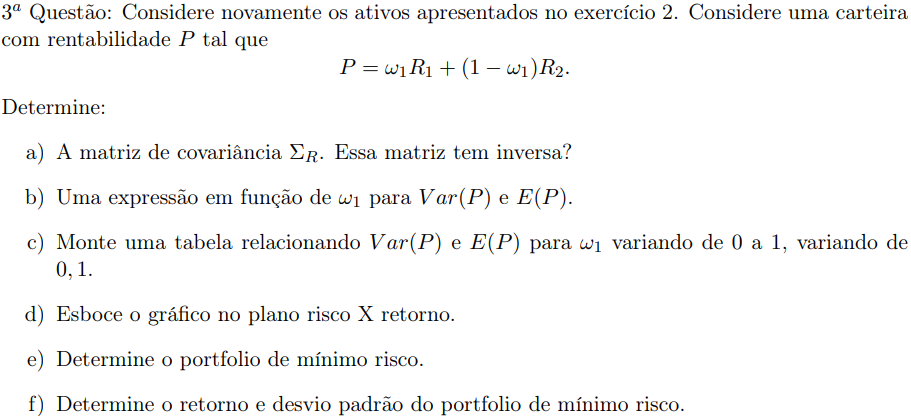

In [8]:
covariance_matrix = np.array([[variance_a1, covariance],[covariance, variance_a2]])
print('Cov Matrix:\n', covariance_matrix)
print('Inv Cov Matrix:\n', np.linalg.inv(covariance_matrix))

Cov Matrix:
 [[ 0.005824   -0.00026   ]
 [-0.00026     0.00116875]]
Inv Cov Matrix:
 [[173.42562915  38.58024691]
 [ 38.58024691 864.19753086]]


#### a)

$$
\Sigma_R = \begin{pmatrix}
\sigma_{R_1}^2 & \sigma_{R_1,R_2} \\
\sigma_{R_1,R_2} & \sigma_{R_2}^2 \end{pmatrix}
= \begin{pmatrix}
0.005824 & -0.00026 \\
-0.00026 & 0.001169 \end{pmatrix}
$$

A matriz possui inversa pois é uma matriz com determinante $\neq 0$, dada por:
$$
\Sigma_R^{-1} = \begin{pmatrix}
173.43 & 38.58 \\
 38.58 & 864.2 \end{pmatrix}
$$

#### b)
$$
E(P) = \omega^T*E(R) = \omega_1*E(R_1) + (1-\omega_1)*E(R_2)
$$

então 

$$
E(P) = \omega^T*E(R) = \omega_1*0.164 + (1-\omega_1)* 0.1175
$$

$$
Var(P) = \omega^T\Sigma\omega = a\omega_1^2 + b\omega_1 + c
$$
onde
$$
a = \sigma_1^2 + \sigma_2^2 - 2\rho\sigma_1\sigma_2 = 0.0075
$$
$$
b = 2\rho\sigma_1\sigma_2 - 2\sigma_2^2 = -0.00286
$$
$$
c = \sigma_2^2 = 0.001168
$$

#### c)

In [9]:
r = [expected_value_a1, expected_value_a2]

# lista de pesos do portfolio
weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

# calcula a tabela risco retorno
risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

# printa a tabela
print_return_table(risk_return_table)

+-------+--------+-----------+
|   w_1 |   E(P) |    Var(P) |
+=======+========+===========+
|   0.0 | 0.1175 | 0.001169  |
|   0.1 | 0.1221 | 0.0009581 |
|   0.2 | 0.1268 | 0.0008978 |
|   0.3 | 0.1315 | 0.0009876 |
|   0.4 | 0.1361 | 0.001228  |
|   0.5 | 0.1407 | 0.001618  |
|   0.6 | 0.1454 | 0.002159  |
|   0.7 | 0.1501 | 0.00285   |
|   0.8 | 0.1547 | 0.003691  |
|   0.9 | 0.1593 | 0.004682  |
|   1.0 | 0.164  | 0.005824  |
+-------+--------+-----------+


#### d)

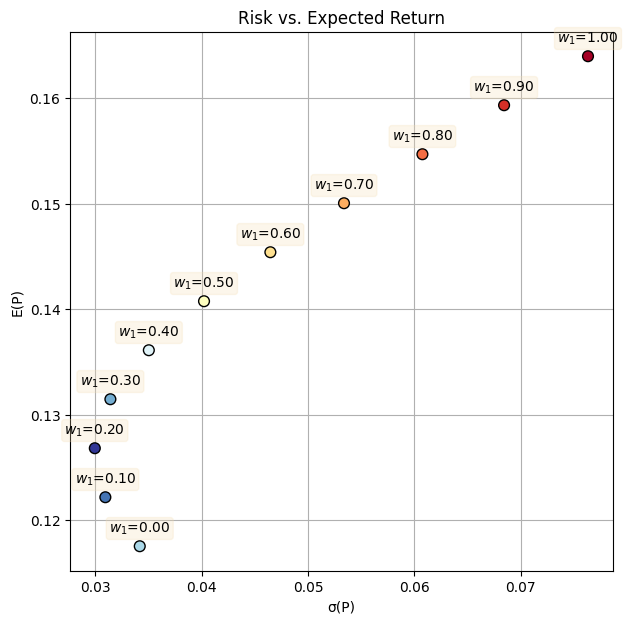

In [10]:
plot_risk_return(risk_return_table)

#### e)

Dada que a variância $\sigma^2 = f(\omega_1)$, e $f$ é uma função quadrática convexa, temos que o mínimo risco se dará quando
$$
f(\omega_1)' = 0 \implies 2a\omega_1^* + b = 0 \implies \omega_1^* = \frac{-b}{2a}
$$
neste ponto temos:
$$
\omega_1^* = 0.1902
$$

In [11]:
min_risk_w = calc_min_risk_2_assets(std_dev_a1, std_dev_a2, correlation)
opt_portfolio = np.array([min_risk_w, 1-min_risk_w])

min_risk_expected_value = calc_expected_return(opt_portfolio, r)
min_risk_variance = calc_variance(opt_portfolio, covariance_matrix)

print(f'w_1 ótimo: {min_risk_w :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value :.4}')
print(f'Desvio padrão mínimo: {min_risk_variance**0.5 :.4}')

w_1 ótimo: 0.1902
Retorno esperado com risco mínimo: 0.1263
Desvio padrão mínimo: 0.02995


#### f)

Com o valor de $\omega_1^*$ ótimo, temos:

$$
E(P^*) = 0.1263
$$
$$
\sigma^* = 0.02995
$$

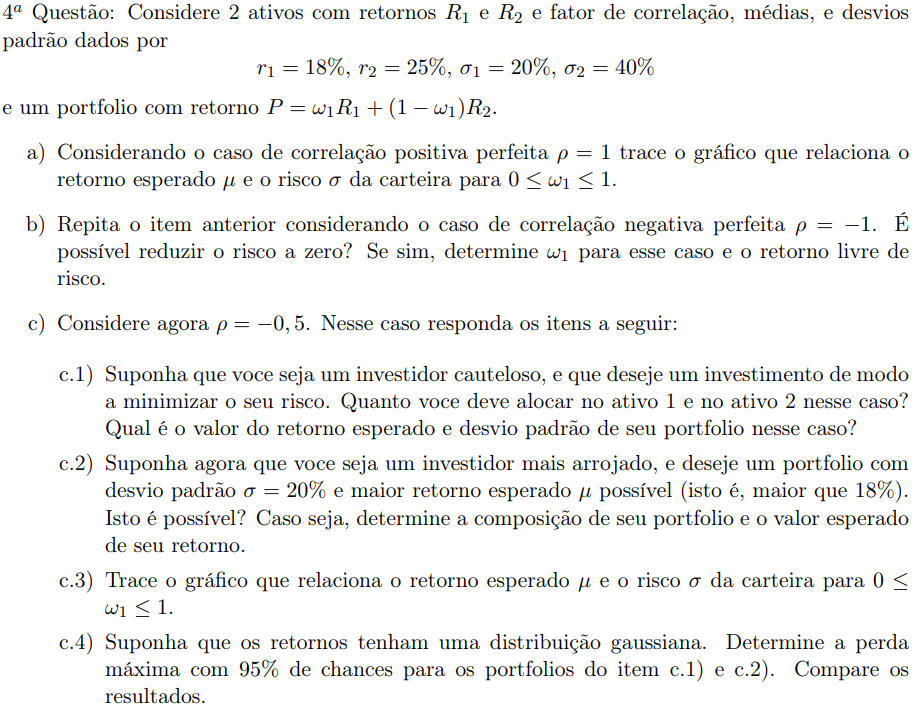

In [12]:
r1 = 0.18
r2 = 0.25
sigma_1 = 0.2
sigma_2 = 0.4

#### a)

+-------+--------+----------+
|   w_1 |   E(P) |   Var(P) |
+=======+========+==========+
|   0.0 |  0.25  |   0.16   |
|   0.1 |  0.243 |   0.1444 |
|   0.2 |  0.236 |   0.1296 |
|   0.3 |  0.229 |   0.1156 |
|   0.4 |  0.222 |   0.1024 |
|   0.5 |  0.215 |   0.09   |
|   0.6 |  0.208 |   0.0784 |
|   0.7 |  0.201 |   0.0676 |
|   0.8 |  0.194 |   0.0576 |
|   0.9 |  0.187 |   0.0484 |
|   1.0 |  0.18  |   0.04   |
+-------+--------+----------+


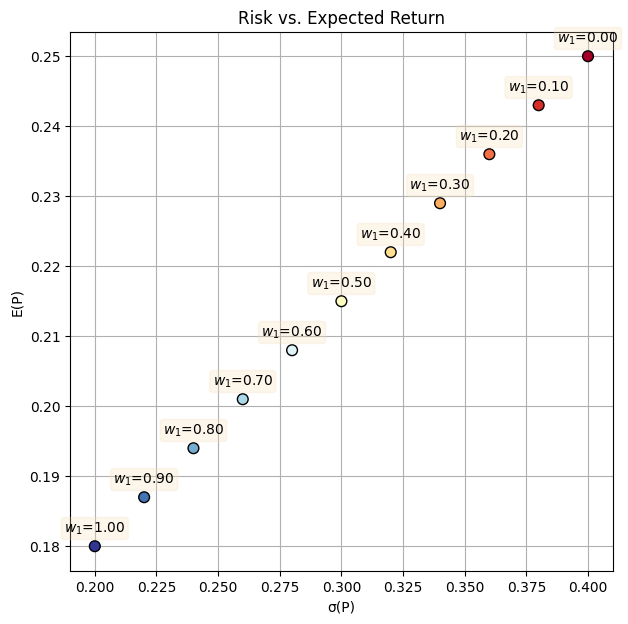

In [13]:
correlation = 1
covariance = (sigma_1*sigma_2)*correlation

covariance_matrix = np.array([
    [sigma_1**2, covariance],
    [covariance, sigma_2**2]
])

r = [r1, r2]

# pesos do portfolio
weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]
# tabela risco retorno
risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

print_return_table(risk_return_table)
plot_risk_return(risk_return_table)

#### b)

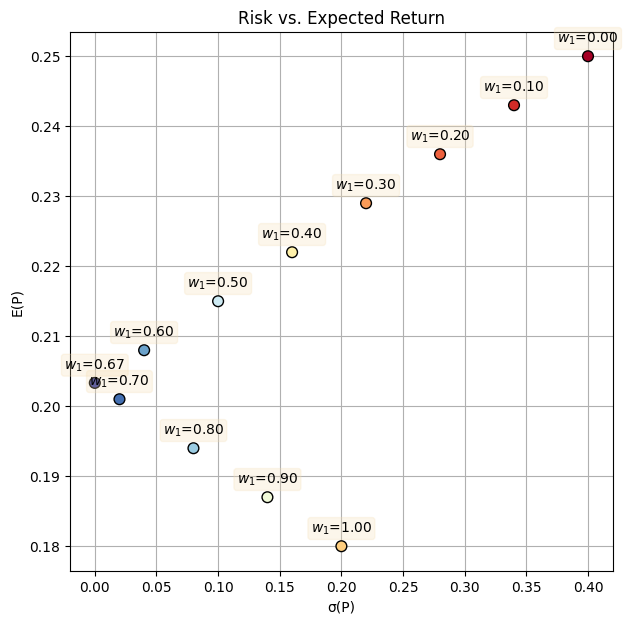

w_1 que minimiza o risco: 0.6667
Retorno esperado com risco mínimo: 0.2033
Desvio padrão mínimo: 1.963e-17


In [14]:
correlation = -1
covariance = (sigma_1*sigma_2)*correlation

covariance_matrix = np.array([
    [sigma_1**2, covariance],
    [covariance, sigma_2**2]
])

r = [r1, r2]

min_risk_w = calc_min_risk_2_assets(sigma_1, sigma_2, correlation)

weight_list = [np.array([i, 1-i]) for i in np.append(np.arange(0, 1.1, 0.1),np.array([min_risk_w])) ]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

plot_risk_return(risk_return_table)

opt_portfolio = np.array([min_risk_w, 1-min_risk_w])

min_risk_expected_value = calc_expected_return(opt_portfolio, r)
min_risk_variance = calc_variance(opt_portfolio, covariance_matrix)

print(f'w_1 que minimiza o risco: {min_risk_w :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value :.4}')
print(f'Desvio padrão mínimo: {min_risk_variance**0.5 :.4}')

Como os ativos possuem correlação inversa perfeita, é possível reduzir o risco do portfólio a 0. 

Neste caso, $\omega_1 = \frac{2}{3}$ e $E(P^*) = 0.2033$

#### C

In [15]:
correlation_c = -0.5
covariance_c = (sigma_1*sigma_2)*correlation_c

covariance_matrix_c = np.array([
    [sigma_1**2, covariance_c],
    [covariance_c, sigma_2**2]
])

#### c.1)

In [16]:
min_risk_w_c1 = calc_min_risk_2_assets(sigma_1, sigma_2, correlation_c)
opt_portfolio_c1 = np.array([min_risk_w_c1, 1-min_risk_w_c1])

min_risk_expected_value_c1 = calc_expected_return(opt_portfolio_c1, r)
min_risk_variance_c1 = calc_variance(opt_portfolio_c1, covariance_matrix_c)
sigma_c1 = min_risk_variance_c1**0.5

print(f'w_1 que minimza o risco: {min_risk_w_c1 :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value_c1 :.4}')
print(f'Desvio padrão mínimo: {sigma_c1 :.4}')

w_1 que minimza o risco: 0.7143
Retorno esperado com risco mínimo: 0.2
Desvio padrão mínimo: 0.1309


No portfólio de mínimo risco, temos: 
$$\omega_1 = 0.7143$$
$$\omega_2 = 0.2857$$ 
$$E(P_{c1}) = 0.2$$
$$\sigma_{c1} = 0.1309$$

#### c.2)


In [17]:
desired_variance = 0.2**2
l1, l2 = solve_portfolio(sigma_1, sigma_2, correlation_c, desired_variance)

portfolio_c2 = np.array([l2, 1-l2])
expected_l2 = calc_expected_return(portfolio_c2, r)

expected_value_c2 = calc_expected_return(portfolio_c2, r)
variance_c2 = calc_variance(portfolio_c2, covariance_matrix_c)
sigma_c2 = variance_c2**0.5

print(f'Alocações possíveis p/ w1: ({l1 :.4}, {l2 :.4})')
print(f'Retorno esperado p/ w1 = 0.4286: {expected_l2 :.4}')
print(f'Desvio padrão: {sigma_c2 :.4}')

Alocações possíveis p/ w1: (1.0, 0.4286)
Retorno esperado p/ w1 = 0.4286: 0.22
Desvio padrão: 0.2


Alocações possíveis p/ $\omega_1$: $(1.0, 0.4286)$

Então temos
$$\omega_1 = 0.4286$$
$$E(P_{c2}) = 0.22$$
$$\sigma_{c2} = 0.2$$

#### c.3)

+-------+--------+----------+
|   w_1 |   E(P) |   Var(P) |
+=======+========+==========+
|   0.0 |  0.25  |   0.16   |
|   0.1 |  0.243 |   0.1228 |
|   0.2 |  0.236 |   0.0912 |
|   0.3 |  0.229 |   0.0652 |
|   0.4 |  0.222 |   0.0448 |
|   0.5 |  0.215 |   0.03   |
|   0.6 |  0.208 |   0.0208 |
|   0.7 |  0.201 |   0.0172 |
|   0.8 |  0.194 |   0.0192 |
|   0.9 |  0.187 |   0.0268 |
|   1.0 |  0.18  |   0.04   |
+-------+--------+----------+


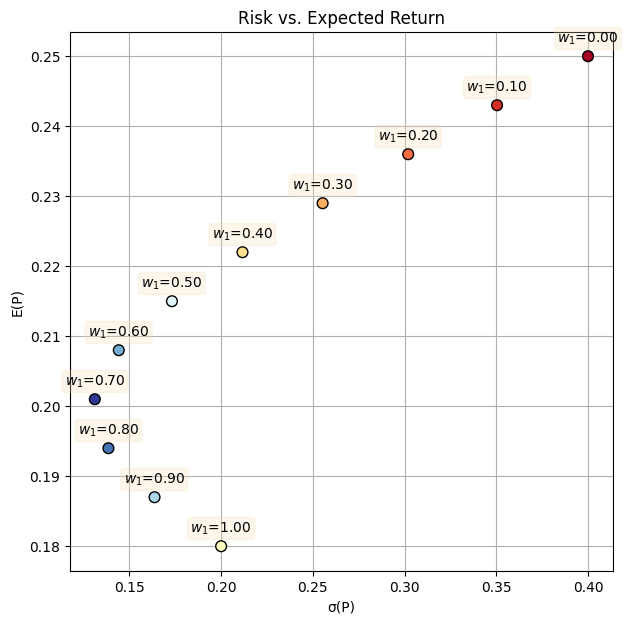

In [18]:
weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix_c)
print_return_table(risk_return_table)
plot_risk_return(risk_return_table)

#### c.4)

In [19]:
(min_risk_expected_value_c1 - 1.65*sigma_c1)*100, (expected_value_c2 - 1.65*sigma_c2)*100

(-1.603571133363249, -11.000000000000002)

Para uma distribuição gaussiana, com 95% de chances, a perda máxima é dada por:
$$
E(P) - 1.65*\sigma_p
$$
então:
$$
P_{c1} = (0.2-1.65*0.1309)*100 = -1.6\%
$$
e
$$
P_{c2} = (0.22-1.65*0.2)*100 = -11\%
$$

Ao aumentar a exposição ao risco, a perda potencial aumenta significativamente

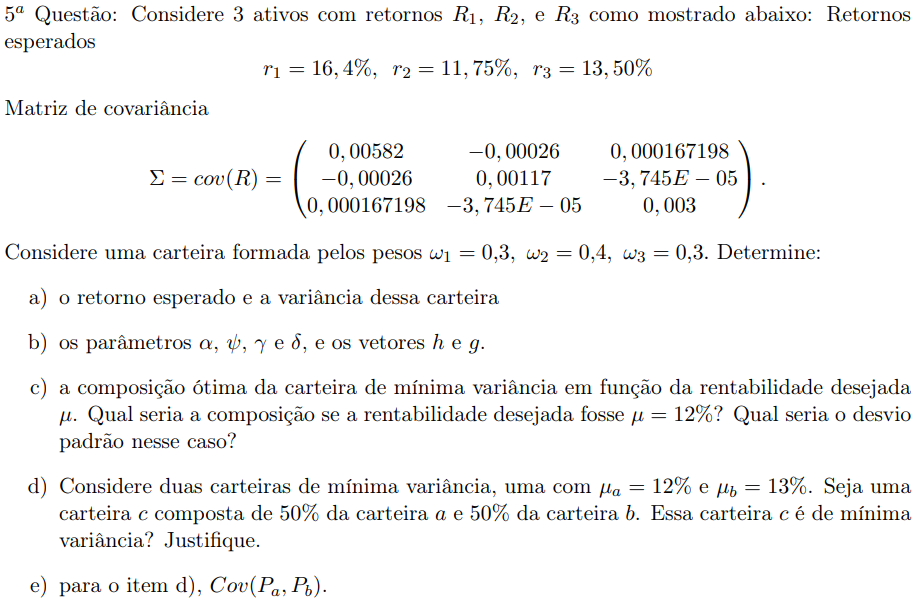

#### a)

In [20]:
r1 = 0.164
r2 = 0.1175
r3 = 0.1350

cov_matrix = np.array([
    [0.00582, -0.00026, 0.000167198],
    [-0.00026, 0.00117, -3.745e-5],
    [0.000167198, -3.745e-5, 0.003]
])

r = [r1, r2, r3]
w = [0.3, 0.4, 0.3]

print(f'Retorno Esperado: {calc_expected_return(w=w, r=r)*100 :.4}%')
print(f'Variância: {calc_variance(w, cov_matrix):.4}')
print(f'Desvio Padrão: {calc_variance(w, cov_matrix)**0.5 :.4}')

Retorno Esperado: 13.67%
Variância: 0.0009397
Desvio Padrão: 0.03065


Temos
$$
E(P) = 13.67\%
$$
$$
Var(P) = 0.0009397
$$
$$
\sigma(P) = 0.03065
$$

#### b)

In [21]:
e = np.ones(3)

inv_cov_matrix = np.linalg.inv(cov_matrix)

alpha = e @ inv_cov_matrix @ e
gamma = r @ inv_cov_matrix @ r
psi = e @ inv_cov_matrix @ r
delta = alpha*gamma - psi**2

print(f'alpha {alpha :.4f}, gamma {gamma :.4f}, psi {psi :.4f}, delta {delta :.4f}')

alpha 1446.7721, gamma 24.0260, psi 185.2657, delta 436.8029


$$\alpha = 1446.77$$
$$\gamma = 24.026$$
$$\psi = 185.2657$$
$$\delta = 436.8029$$

In [22]:
h = alpha/delta * inv_cov_matrix @ r - psi/delta * inv_cov_matrix @ e
print(f'h: {h}')

h: [ 19.14038593 -25.42450331   6.28411738]


$$h = [19.14, -25.42, 6.28]$$

In [23]:
g = gamma/delta * inv_cov_matrix @ e - psi/delta * inv_cov_matrix @ r
print(f'g: {g}')

g: [-2.31075763  3.88503021 -0.57427258]


$$g = [-2.31,  3.885, -0.574]$$

#### c) e d)

In [24]:
desired_a = np.ones(3)*0.12
portfolio_a = h * desired_a + g
risk_a = np.sqrt(portfolio_a @ cov_matrix @ portfolio_a)

print('Portfolio:', portfolio_a)
print('Risco:', risk_a)

Portfolio: [-0.01391132  0.83408981  0.1798215 ]
Risco: 0.030101039773259404


A carteira é dada por 
$$
\omega = h * \mu + g \implies
$$
$$
\omega = \begin{bmatrix}
19.14 \\
-25.42 \\
6.28
\end{bmatrix} * \mu + 
\begin{bmatrix}
-2.31 \\
3.885 \\
-0.574
\end{bmatrix}
$$

para $\mu_a = 0.12$
$$
\omega_a = [-0.0139, 0.834,  0.1798]
$$
$$
\sigma_a = 0.03
$$

In [25]:
desired_b = np.ones(3)*0.13
portfolio_b = h * desired_b + g
risk_b = np.sqrt(portfolio_b @ cov_matrix @ portfolio_b)

print(f'Portfolio: {portfolio_b}')
print(f'Risco: {risk_b :.4}')

Portfolio: [0.17749254 0.57984478 0.24266268]
Risco: 0.02653


para $\mu_b = 0.13$
$$
\omega_b = [0.1775, 0.5798, 0.2426]
$$
$$
\sigma_b = 0.02653
$$

In [26]:
w_c = 0.5*portfolio_a + 0.5*portfolio_b

print(f'Portfolio: {w_c}')
print(f'Risco: {np.sqrt(w_c @ cov_matrix @ w_c) :.4}')

desired_c = np.ones(3)*0.125
portfolio_c = h * desired_c + g
risk_c = np.sqrt(portfolio_c @ cov_matrix @ portfolio_c)

print('-x-')

print(f'Portfolio: {portfolio_c}')
print(f'Risco: {risk_c :.4}')

Portfolio: [0.08179061 0.7069673  0.21124209]
Risco: 0.02687
-x-
Portfolio: [0.08179061 0.7069673  0.21124209]
Risco: 0.02687


O portfolio é de mínima variância porque é uma combinação linear de portfolios de mínima variância. Ao especificar um retorno desejado equivalente à composição de A e B, chegamos ao mesmo resultado de variância

#### e)

In [27]:
u_a = 0.12
u_b = 0.13
cov_a_b = alpha/delta * (u_a - psi/alpha)*(u_b - psi/alpha) + 1/alpha
print(f'cov_a_b: {cov_a_b :.4}')

cov_a_b: 0.0006393


$$
Cov(P_a,P_b) = 0.0006393
$$

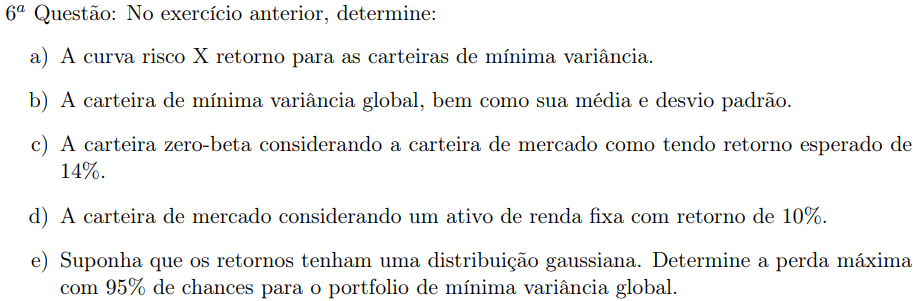

### a)

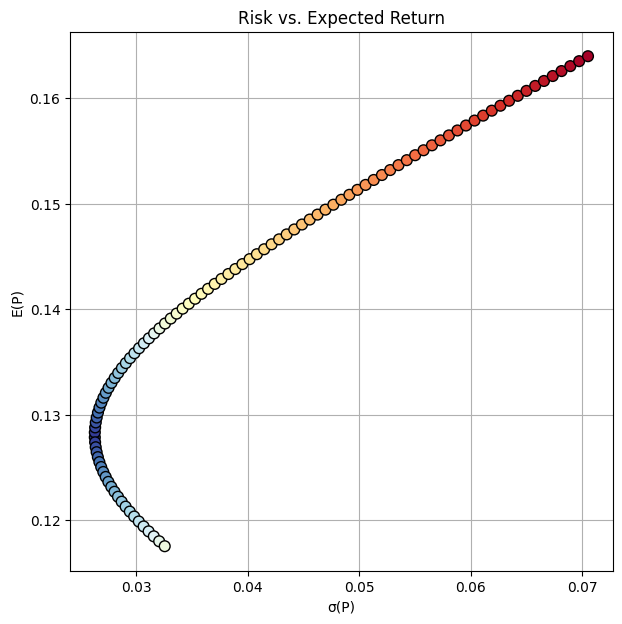

In [28]:
min_return = min(r)
max_return = max(r)
returns_list = np.linspace(min_return, max_return, 100)
risk_return_table = []

for desired_return in returns_list:
    desired_return_list = np.ones(3)*desired_return
    portfolio = h * desired_return_list + g
    variance = portfolio @ cov_matrix @ portfolio
    
    risk_return_table.append([[round(i,4) for i in portfolio], desired_return, variance])

plot_risk_return(risk_return_table, annotate=False, risk='σ(P)')

#### b)

In [29]:
w_g = 1/alpha * inv_cov_matrix @ e
mu_g = psi/alpha
variance_g = 1/alpha

print(f'Portfolio: {w_g}')
print(f'Retorno Esperado: {mu_g}')
print(f'Desvio Padrão: {variance_g**0.5}')

Portfolio: [0.1402552  0.62930777 0.23043702]
Retorno Esperado: 0.12805451486930558
Desvio Padrão: 0.02629056630682208


A carteira de mínima variância global é dada por:
$$
\omega_g = \frac{1}{\alpha} * \Sigma^{-1} e
$$
$$
\omega_g = [0.14,  0.63, 0.23]
$$
$$
E(\omega_g) = 12.8\%
$$
$$
\sigma(\omega_g) = 0.0263
$$


#### c)

In [30]:
mu_market = 0.14
mu_zero_beta = psi/alpha - delta/(alpha**2*(mu_market - psi/alpha))
mu_zero_beta
desired_return_list = np.ones(3)*mu_zero_beta
portfolio = h * desired_return_list + g
risk = np.sqrt(portfolio @ cov_matrix @ portfolio)

print(f'Portfolio: {portfolio}')
print(f'Retorno esperado zero_beta: {mu_zero_beta*100 :.4}%')
print(f'Desvio Padrão {risk :.4}' )

Portfolio: [-0.19411853  1.07346214  0.12065638]
Retorno esperado zero_beta: 11.06%
Desvio Padrão 0.04126


#### d)

In [31]:
r_f = 0.1
mu_t = (gamma - r_f*psi) / (psi - r_f*alpha)
w_t = 1/(psi - r_f*alpha) * inv_cov_matrix @ (r - r_f*e)
sigma_t = np.sqrt(w_t @ cov_matrix @ w_t)

print(f'Portfolio: {w_t}')
print(f'Retorno esperado carteira de mercado: {mu_t*100 :.4}%')
print(f'Desvio Padrão {sigma_t :.4}' )

Portfolio: [0.28263002 0.44018886 0.27718112]
Retorno esperado carteira de mercado: 13.55%
Desvio Padrão 0.02957


#### e)

In [32]:
w_g = 1/alpha * inv_cov_matrix @ e
mu_g = psi/alpha
sigma_g = (1/alpha)**0.5

max_loss_95 = (mu_g - 1.645*sigma_g)
print(f'Perda maxima com 95% de chances: {max_loss_95*100 :.4}%')

Perda maxima com 95% de chances: 8.481%


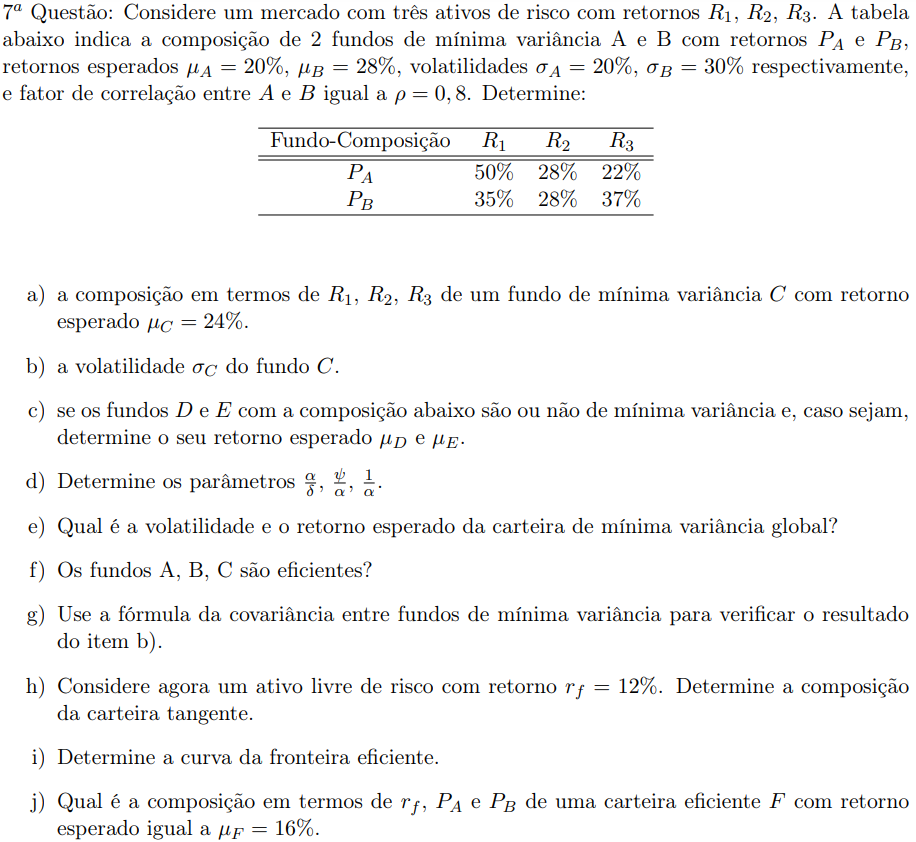
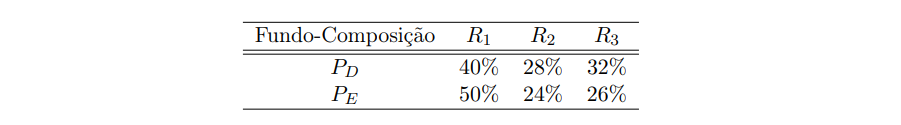

In [33]:
mu_a = 0.2
mu_b = 0.28

sigma_a = 0.2
sigma_b = 0.3

rho = 0.8

composition_a = np.array([0.5, 0.28, 0.22])
composition_b = np.array([0.35, 0.28, 0.37])

composition = np.array([
    composition_a, 
    composition_b
])

cov_matrix = np.array([
    [sigma_a**2, rho*sigma_a*sigma_b],
    [rho*sigma_a*sigma_b, sigma_b**2]
])

r = [mu_a, mu_b]

e = np.ones(2)

inv_cov_matrix = np.linalg.inv(cov_matrix)

alpha = e @ inv_cov_matrix @ e
gamma = r @ inv_cov_matrix @ r
psi = e @ inv_cov_matrix @ r
delta = alpha*gamma - psi**2


In [34]:
h = alpha/delta * inv_cov_matrix @ r - psi/delta * inv_cov_matrix @ e
g = gamma/delta * inv_cov_matrix @ e - psi/delta * inv_cov_matrix @ r

#### a) e b)

In [35]:
mu_c = 0.24
desired_c = np.ones(2)*mu_c
portfolio_c = h * desired_c + g
risk_c = np.sqrt(portfolio_c @ cov_matrix @ portfolio_c)
composition_c  = portfolio_c @ composition
composition_assets = list(zip([], composition_c))
print(f'Composição da carteira: \nR1: {composition_c[0] :.4} \nR2: {composition_c[1] :.4} \nR3: {composition_c[2] :.4}')
print(f'Desvio Padrão: {risk_c :.4}')

Composição da carteira: 
R1: 0.425 
R2: 0.28 
R3: 0.295
Desvio Padrão: 0.2377


### c)

In [36]:
composition_d = np.array([0.4, 0.28, 0.32])
composition_e = np.array([0.5, 0.24, 0.26])

composition_d_e = np.array([
    composition_d,
    composition_e
])

In [37]:
k = (composition_d - composition_b) / (composition_a-composition_b)
k = k[0]
expected_d = k*mu_a + (1-k)*mu_b
desired_d = np.ones(2)*expected_d
portfolio_d = h * desired_d + g
risk_d = np.sqrt(portfolio_d @ cov_matrix @ portfolio_d)
composition_d = portfolio_d @ composition
print(f'Proporção entre A e B: {k :.4}') 
print(f'Composição da com esta proporção: \nR1: {composition_d[0] :.4} \nR2: {composition_d[1] :.4} \nR3: {composition_d[2] :.4}')
print(f'Retorno Esperado: {expected_d :.4}')

Proporção entre A e B: 0.3333
Composição da com esta proporção: 
R1: 0.4 
R2: 0.28 
R3: 0.32
Retorno Esperado: 0.2533


D é um fundo de mínima variância por ser uma combinação linear de A e B

In [38]:
k = (composition_e - composition_b) / (composition_a-composition_b)
k = k[2]

expected_e = k * mu_a + (1-k) * mu_b

desired_e = np.ones(2)*expected_e
portfolio_e = h * desired_e + g
risk_e = np.sqrt(portfolio_e @ cov_matrix @ portfolio_e)
composition_e = portfolio_e @ composition

print(f'Proporção entre A e B: {k :.4}') 
print(f'Composição da com esta proporção: \nR1: {composition_e[0] :.4} \nR2: {composition_e[1] :.4} \nR3: {composition_e[2] :.4}')

Proporção entre A e B: 0.7333
Composição da com esta proporção: 
R1: 0.46 
R2: 0.28 
R3: 0.26


E não é um fundo de mínima variânvia por não ser possível obter sua composição através de uma combinação linear de fundos de mínima variância

#### d)

In [39]:
a = alpha/delta
b = psi/alpha
c = 1/alpha
print(a, b, c)

5.312499999999996 0.1811764705882353 0.038117647058823534


$$
a = \frac{\alpha}{\delta} = 5.3125
$$
$$
b = \frac{\psi}{\alpha} = 0.1811
$$
$$
c = \frac{1}{\alpha} = 0.03811
$$

#### e)

In [40]:
w_g = 1/alpha * inv_cov_matrix @ e
mu_g = psi/alpha
variance_g = 1/alpha

print(f'Retorno esperado mínimo global: {mu_g*100 :.4}')
print(f'Volatilidade: {variance_g**0.5 :.4}')

Retorno esperado mínimo global: 18.12
Volatilidade: 0.1952


A carteira de mínima variância global é dada por:
$$
\omega_g = \frac{1}{\alpha} * \Sigma^{-1} e
$$
$$
E(\omega_g) = 18.11\%
$$
$$
\sigma(\omega_g) = 0.1952
$$


#### f)
Os fundos são eficientes se:
$$
\frac{1}{1/\alpha}\sigma^2 - \frac{1}{\delta/\alpha^2}(\mu - \frac{\psi}{\alpha})^2 = 1
$$

In [41]:
print(1/(1/alpha)*sigma_a**2 - 1/(delta/alpha**2) * (mu_a - psi/alpha)**2)
print(1/(1/alpha)*sigma_b**2 - 1/(delta/alpha**2) * (mu_b - psi/alpha)**2)
print(1/(1/alpha)*risk_c**2 - 1/(delta/alpha**2) * (mu_c - psi/alpha)**2)

1.0000000000000002
1.0000000000000004
1.0000000000000036


Portanto os fundos são eficientes

#### g)

In [42]:
cov_funds = (a*(mu_c - b)*(mu_c-b) + c)**0.5
print(f'Variância fundo C: {cov_funds :.4}')

Variância fundo C: 0.2377


O resultado é igual ao item b)

#### h)

In [43]:
r_f = 0.12
mu_t = (gamma - r_f*psi)/(psi - r_f*alpha)
desired_t = np.ones(2)*mu_t
portfolio_t = h * desired_t + g

risk_t = np.sqrt(portfolio_t @ cov_matrix @ portfolio_t)
print(f'Carteira tangente: {portfolio_t}')
print(f'Retorno Esperado Carteira tangente: {mu_t*100 :.4}%')
print(f'Volatilidade carteira tangente: {risk_t :.4}')
print(f'Composição R1, R2, R3: {portfolio_t @ composition}')

Carteira tangente: [-0.23076923  1.23076923]
Retorno Esperado Carteira tangente: 29.85%
Volatilidade carteira tangente: 0.3335
Composição R1, R2, R3: [0.31538462 0.28       0.40461538]


Temos que
$$
\mu_t = \frac{\gamma - r_f\psi}{\psi - r_f\alpha} = 29.85\%
$$
$$
\omega_t = [-0.23076923, 1.23076923]
$$
$$
R1, R2, R3 = [0.315, 0.28, 0.404]
$$

#### i)

+------------------+--------+---------+
| Pa, Pb           |   E(P) |    σ(P) |
+==================+========+=========+
| [1.0, -0.0]      | 0.2    | 0.04    |
| [0.9474, 0.0526] | 0.2042 | 0.04094 |
| [0.8947, 0.1053] | 0.2084 | 0.04206 |
| [0.8421, 0.1579] | 0.2126 | 0.04337 |
| [0.7895, 0.2105] | 0.2168 | 0.04488 |
| [0.7368, 0.2632] | 0.2211 | 0.04657 |
| [0.6842, 0.3158] | 0.2253 | 0.04844 |
| [0.6316, 0.3684] | 0.2295 | 0.05051 |
| [0.5789, 0.4211] | 0.2337 | 0.05276 |
| [0.5263, 0.4737] | 0.2379 | 0.05521 |
| [0.4737, 0.5263] | 0.2421 | 0.05784 |
| [0.4211, 0.5789] | 0.2463 | 0.06066 |
| [0.3684, 0.6316] | 0.2505 | 0.06367 |
| [0.3158, 0.6842] | 0.2547 | 0.06686 |
| [0.2632, 0.7368] | 0.2589 | 0.07025 |
| [0.2105, 0.7895] | 0.2632 | 0.07382 |
| [0.1579, 0.8421] | 0.2674 | 0.07758 |
| [0.1053, 0.8947] | 0.2716 | 0.08153 |
| [0.0526, 0.9474] | 0.2758 | 0.08567 |
| [0.0, 1.0]       | 0.28   | 0.09    |
+------------------+--------+---------+


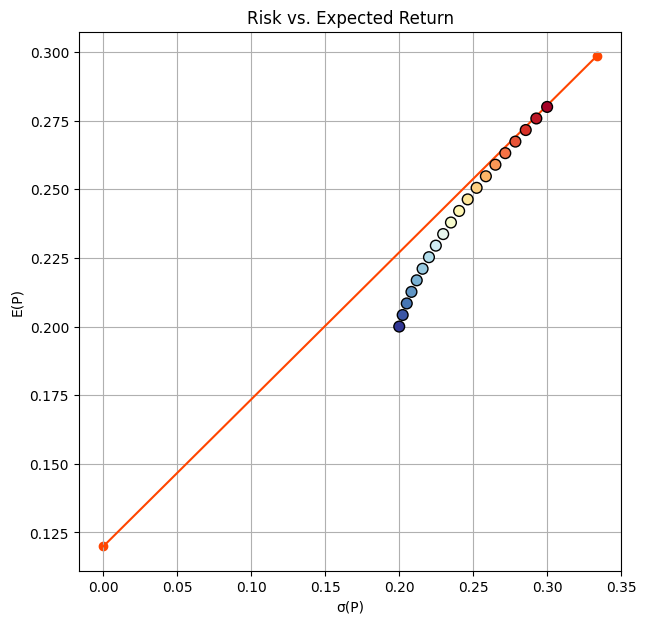

In [44]:
min_return = min(r)
max_return = max(r)
returns_list = np.linspace(min_return, max_return, 20)
risk_return_table = []

for desired_return in returns_list:
    desired_return_list = np.ones(2)*desired_return
    portfolio = h * desired_return_list + g
    variance = portfolio @ cov_matrix @ portfolio
    
    risk_return_table.append([[round(i,4) for i in portfolio], desired_return, variance])

print_return_table(risk_return_table, headers=['Pa, Pb', 'E(P)', 'σ(P)'])
plot_risk_return(risk_return_table, annotate=False, risk='σ(P)', risk_free={'r_f':r_f, 'w_t':[risk_t, mu_t]})

#### j)

In [46]:
r_f = 0.12
mu_f = 0.16

w_t = (mu_f - mu_t)/(r_f-mu_t)

w = (0.16 - r_f)/((r - r_f * e).T @ inv_cov_matrix @ (r - r_f * e)) * inv_cov_matrix @ (r - r_f * e)

print(f'Proporção livre de risco: {w_t :.4}')
print(f'Proporção Pa: {w[0]}')
print(f'Proporção Pb: {w[1]}')
print(f'Verificação de Valor esperado: {w_t*r_f + w @ r}')

Proporção livre de risco: 0.7759
Proporção Pa: -0.05172413793103458
Proporção Pb: 0.2758620689655172
Verificação de Valor esperado: 0.15999999999999998
